# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
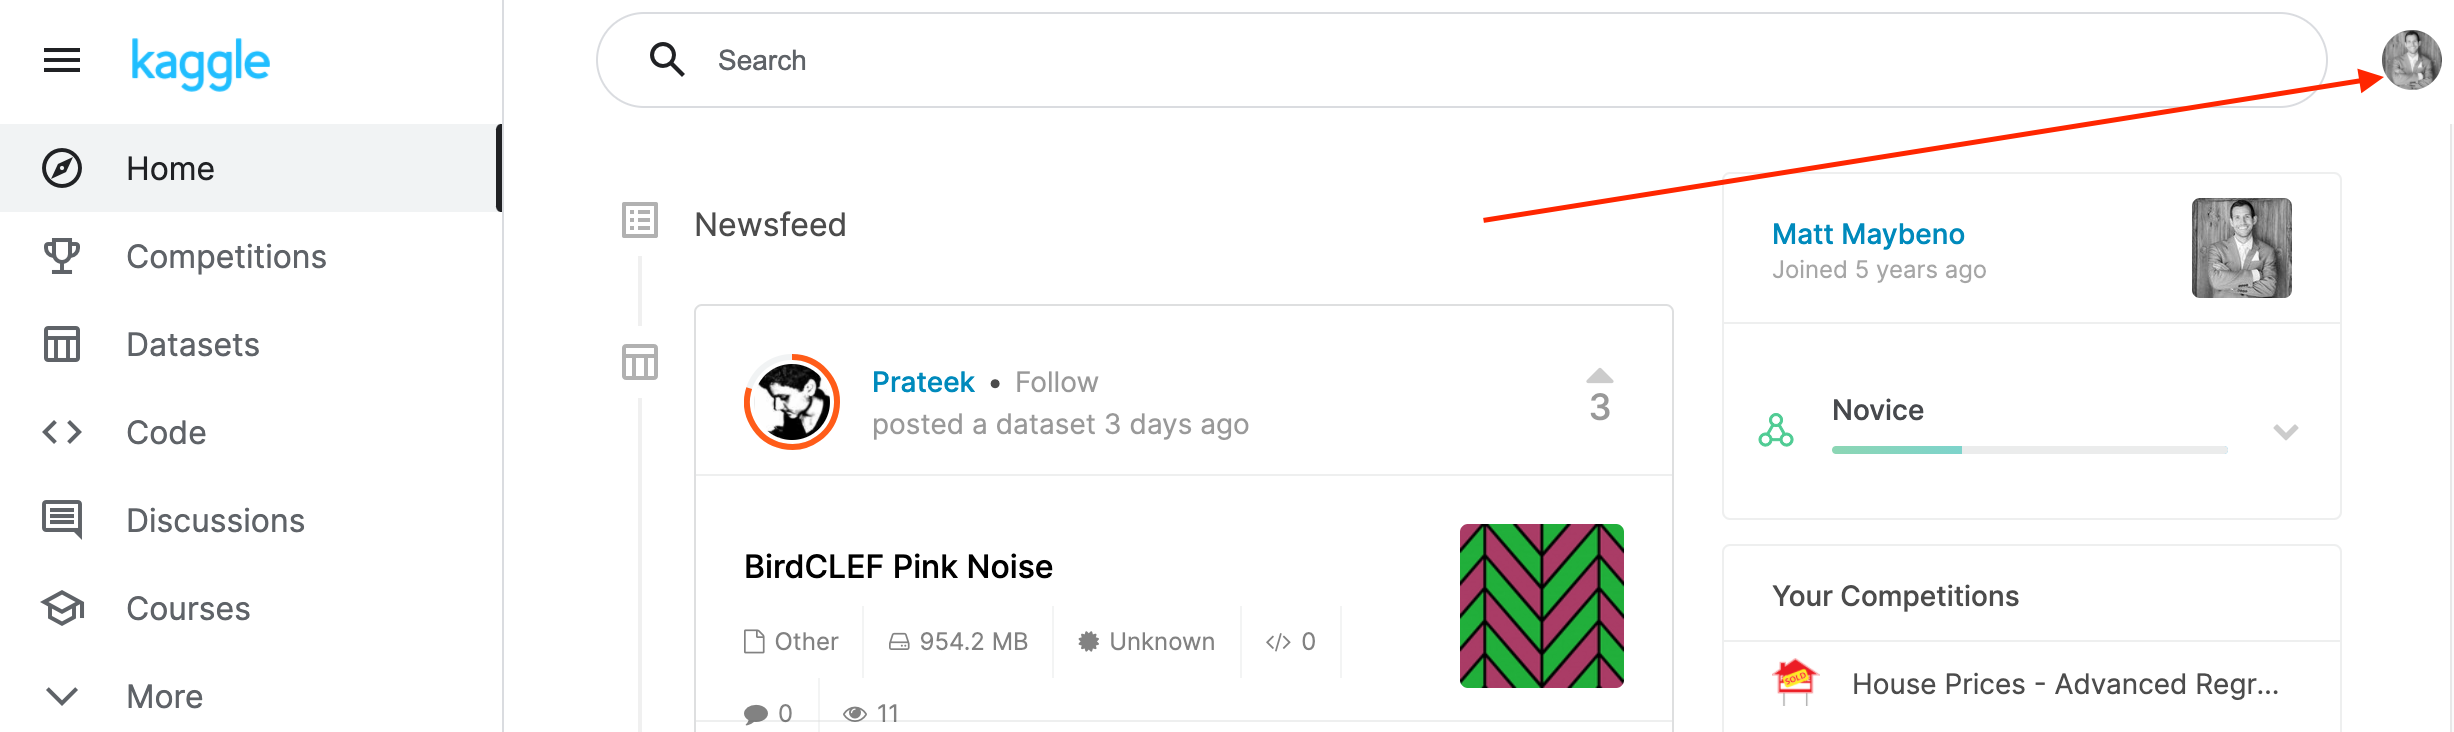
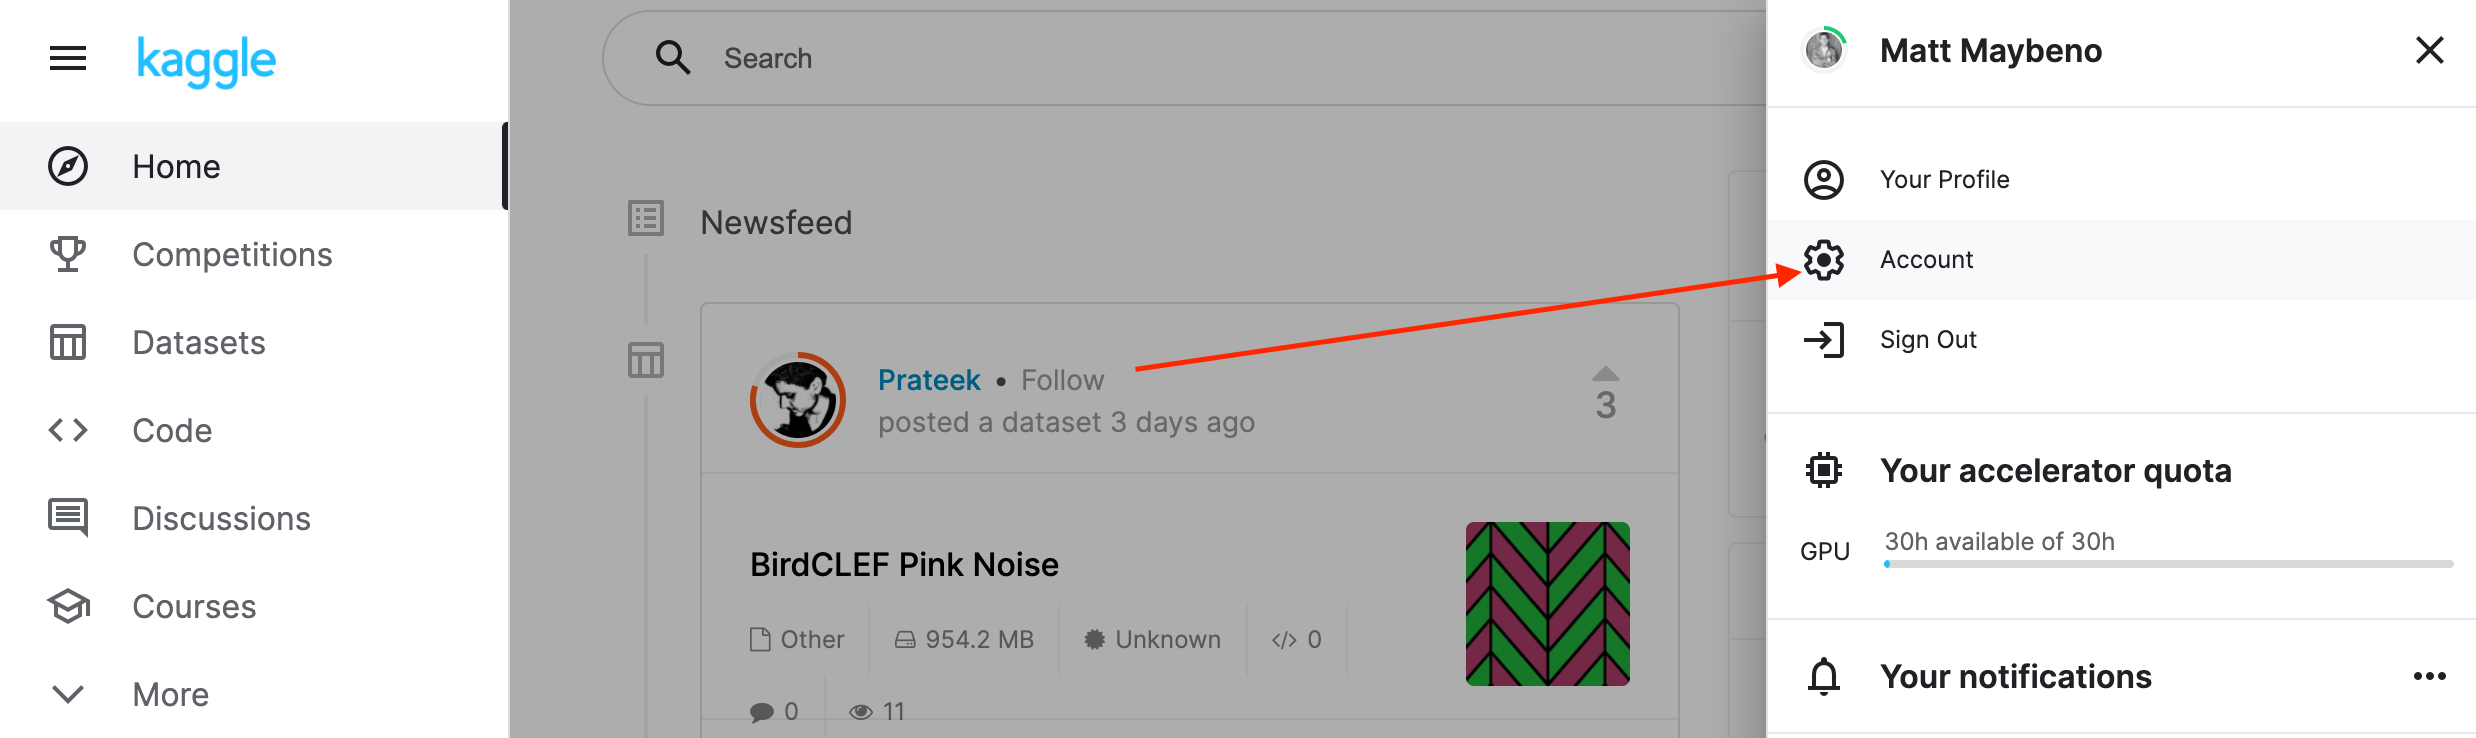
2. Scroll down to API and click Create New API Token.
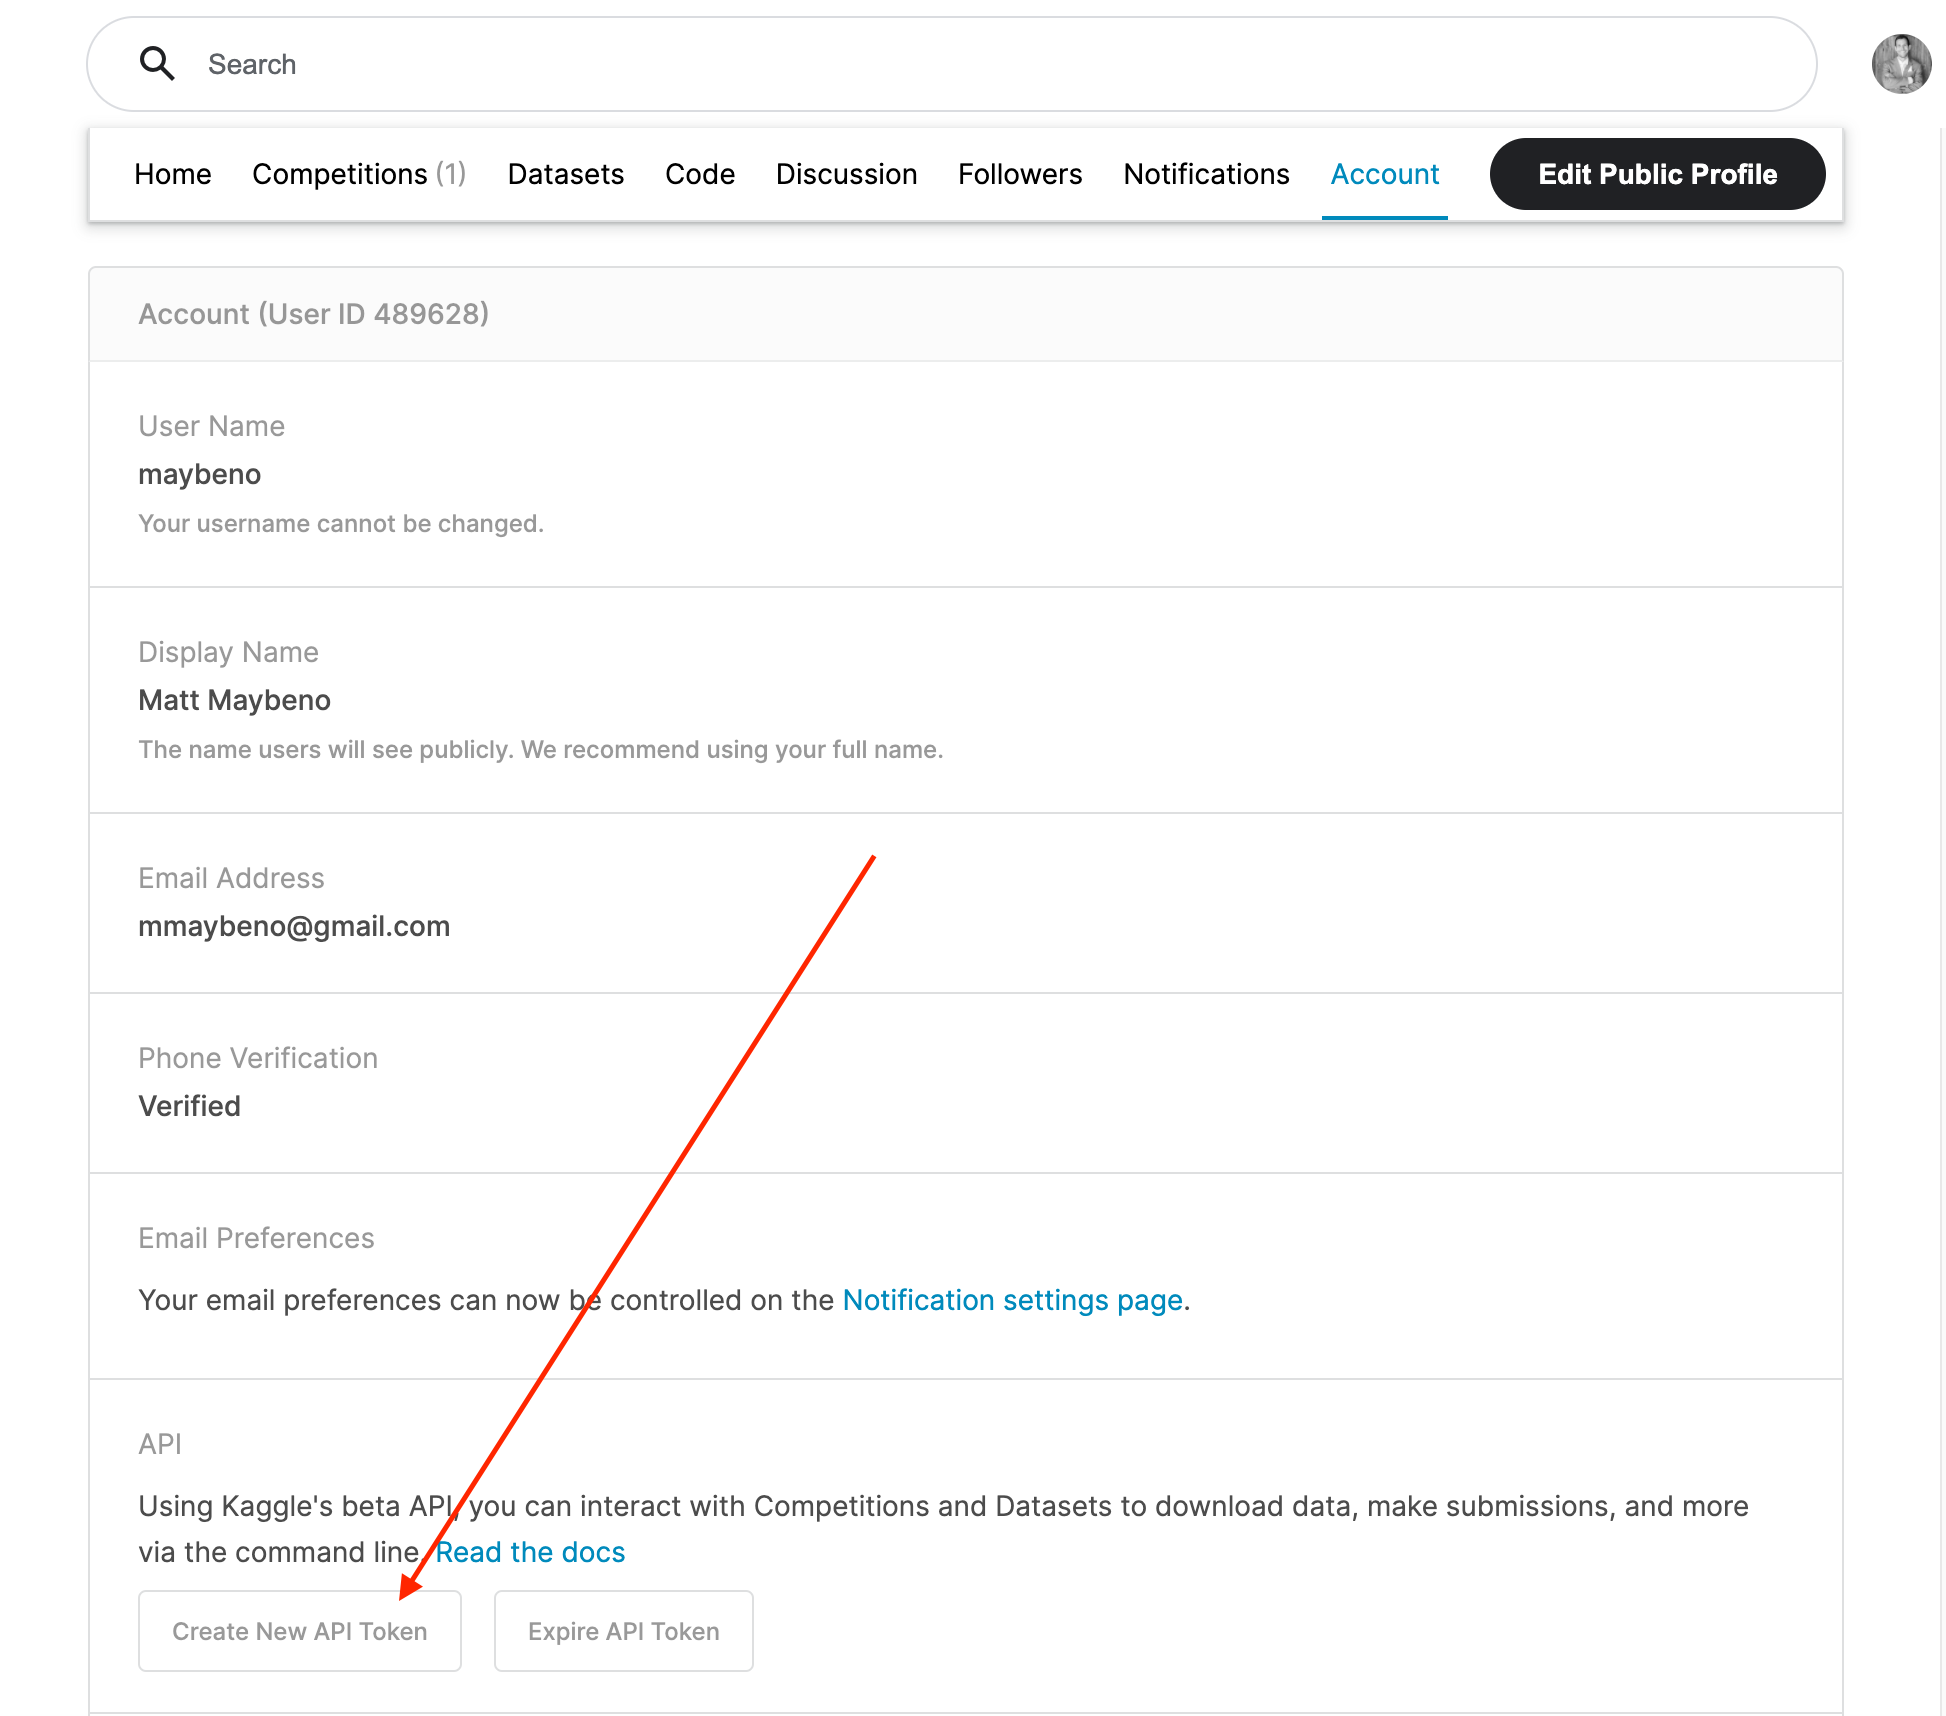
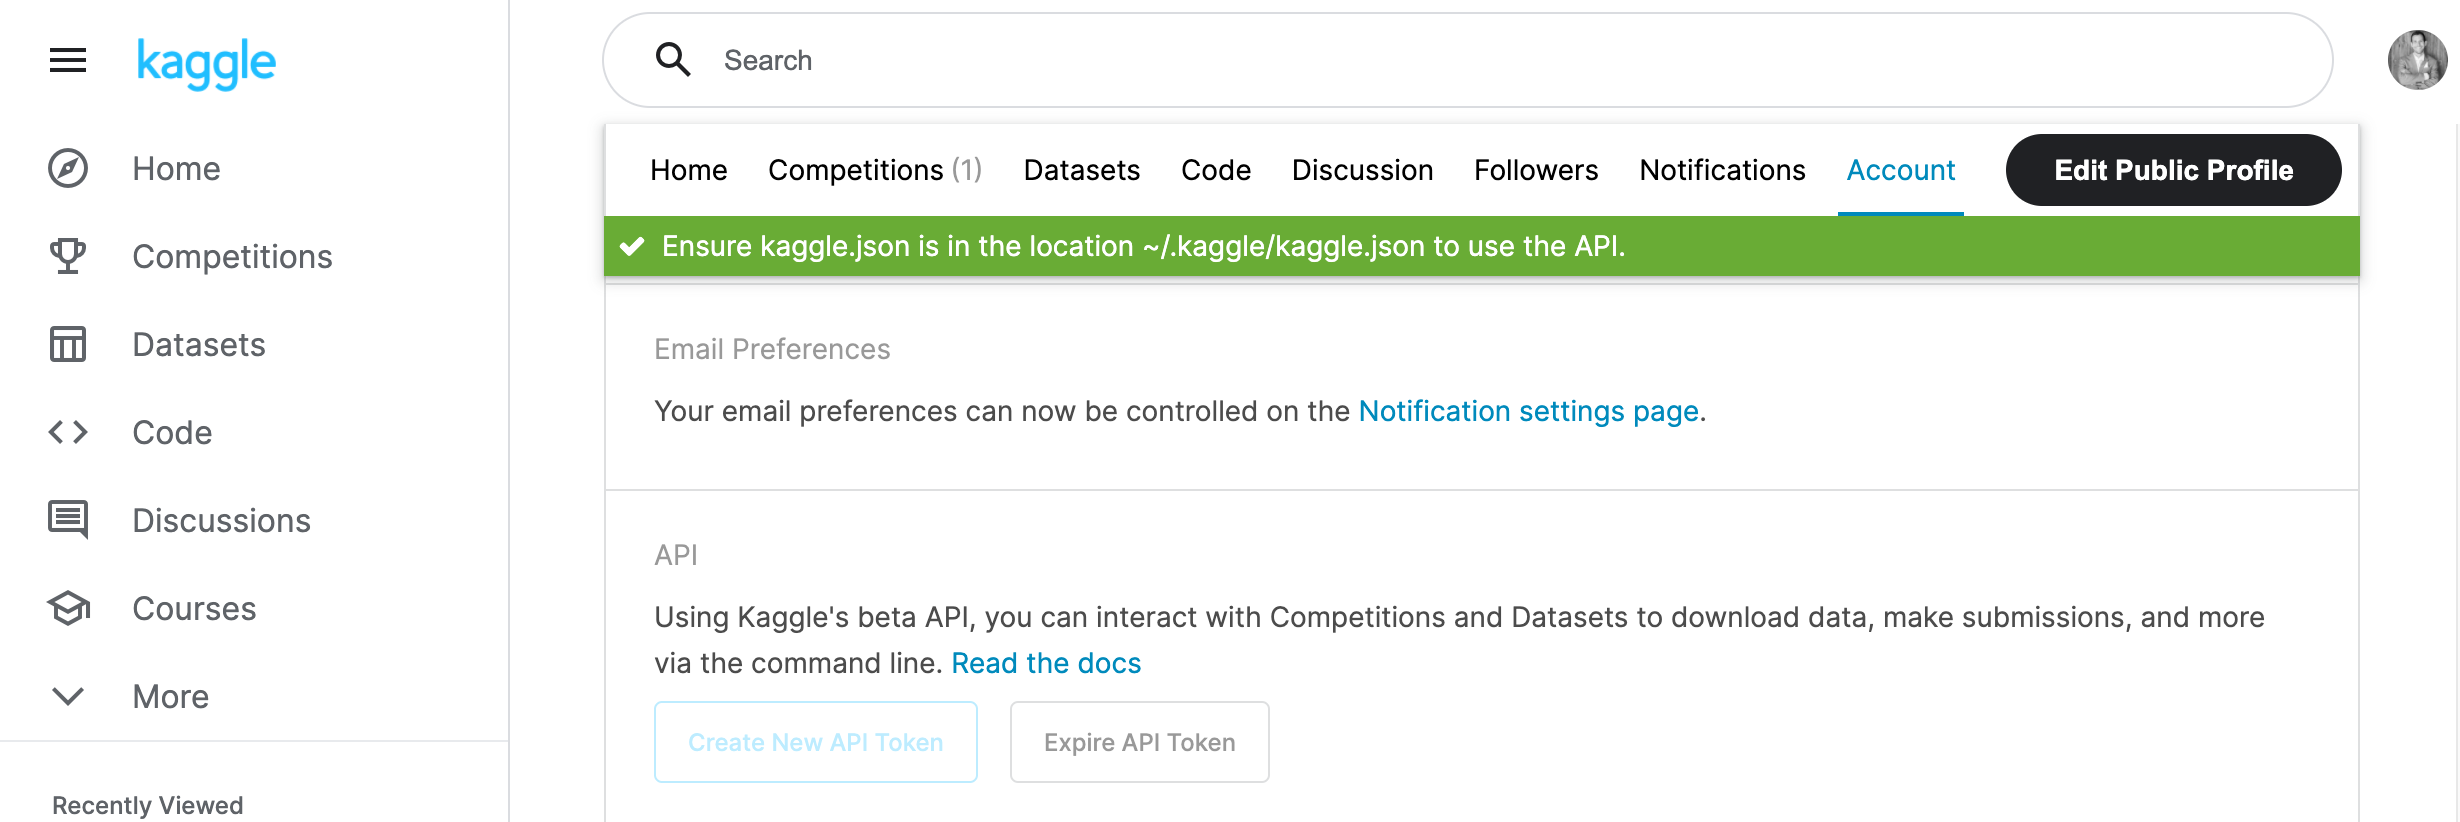
3. Open up `kaggle.json` and use the username and key.
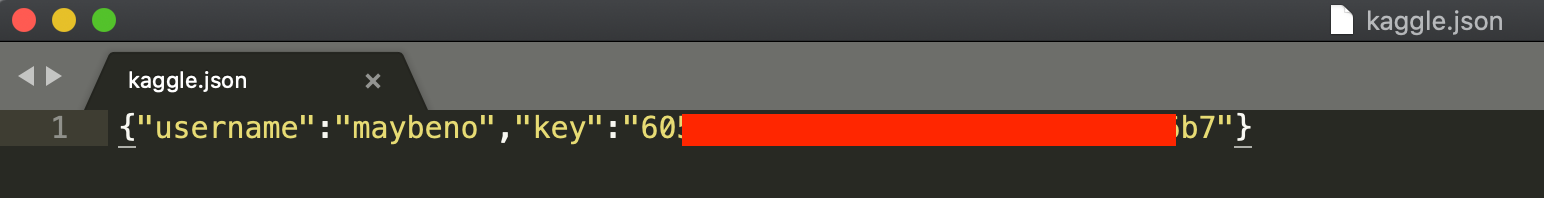

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\mkand\anaconda3\python.exe -m pip install -U pip


  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.28.2 which is incompatible.
openxlab 0.0.38 requires setuptools~=60.2.0, but you have setuptools 69.5.1 which is incompatible.


  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl.metadata (402 bytes)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.18.4-py2.py3-none-any.whl.metadata (50 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached idna-2.6-py2.py3-none-any.whl.metadata (8.9 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl.metadata (32 kB)
Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
Using cached idna-2.6-py2.py3-none-any.whl (56 kB)
Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\mkand\AppData\Local\Temp\pip-install-u9jak0gl\numpy_1efd72edd2c049c3afb7f16491d4445e\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\mkand\\anaconda3\\lib', 'C:\\', 'C:\\Users\\mkand\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\mkand\\anaconda3\\lib', 'C:\\', 'C:\\Users\\mkand\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module name

   ---------------------------------------- 0.0/953.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/953.1 kB ? eta -:--:--
   ---------------------------------------- 10.2/953.1 kB ? eta -:--:--
   ---------------------------------------- 10.2/953.1 kB ? eta -:--:--
   ---------------------------------------- 10.2/953.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/953.1 kB 145.2 kB/s eta 0:00:07
   - ------------------------------------- 30.7/953.1 kB 145.2 kB/s eta 0:00:07
   - ------------------------------------- 41.0/953.1 kB 130.7 kB/s eta 0:00:07
   -- ------------------------------------ 61.4/953.1 kB 192.5 kB/s eta 0:00:05
   --- ----------------------------------- 92.2/953.1 kB 249.0 kB/s eta 0:00:04
   ---- --------------------------------- 112.6/953.1 kB 261.9 kB/s eta 0:00:04
   ----- -------------------------------- 143.4/953.1 kB 315.4 kB/s eta 0:00:03
   -------- ----------------------------- 204.8/953.1 kB 401.2 kB/s eta 0:00:02
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.28.2 which is incompatible.


### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

The syntax of the command is incorrect.
'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "andersonmk"
kaggle_key = "960f96bb529b1627d145c589c1322629"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
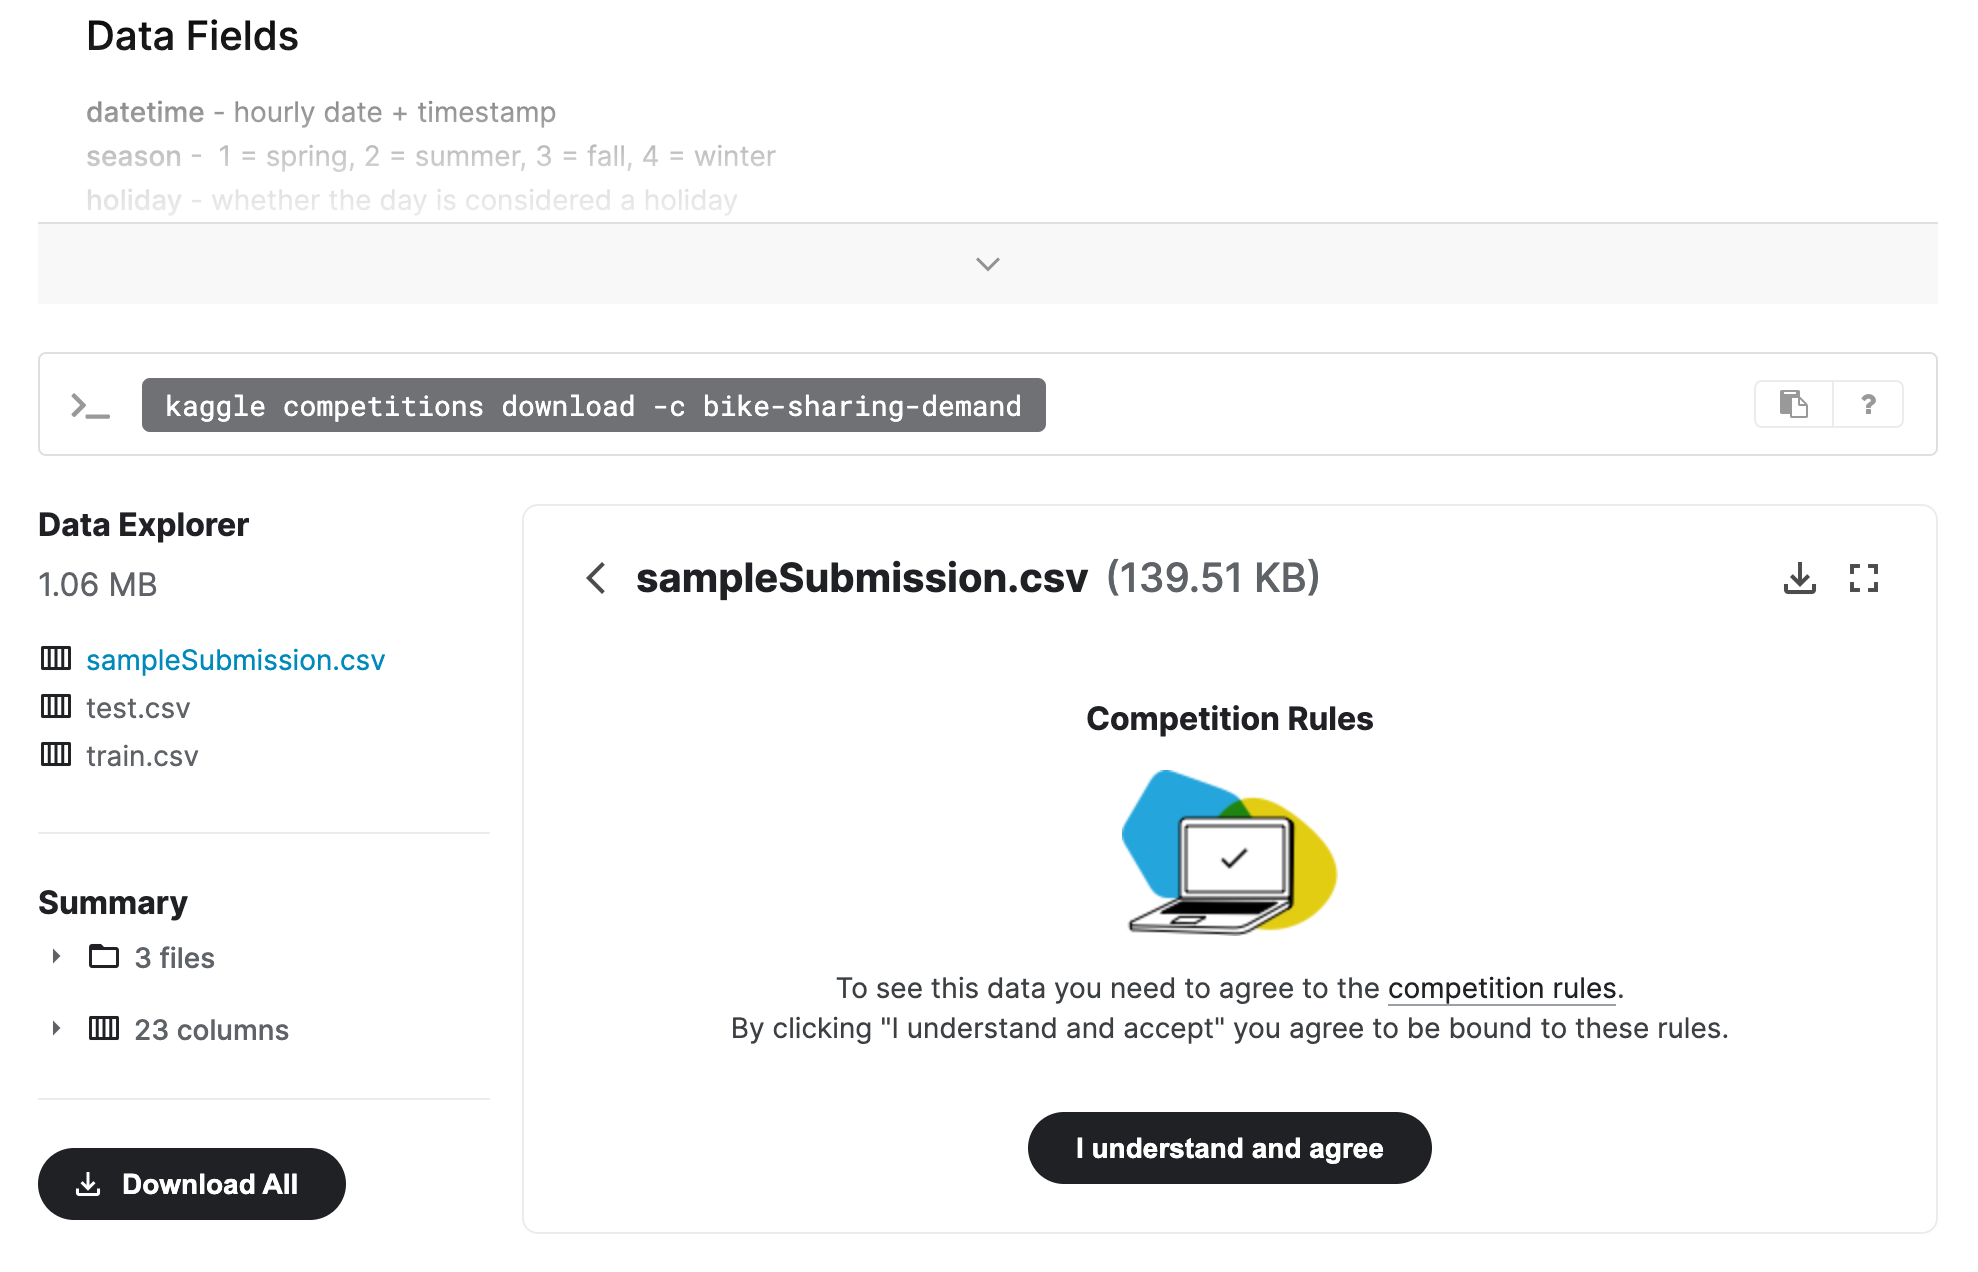

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
import kaggle
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

OSError: Could not find kaggle.json. Make sure it's located in C:\Users\mkand\.kaggle. Or use the environment method.

In [2]:
import os
DATA_DIR = os.path.join(os.getcwd(), 'bike-sharing-demand')
print(DATA_DIR)

C:\Users\mkand\Documents\Machine Learning Fundamentals\cd0385-project-starter\project\bike-sharing-demand


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

In [38]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv(DATA_DIR + '/train.csv')
train['datetime'] = pd.to_datetime(train.datetime)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [158]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [159]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv(DATA_DIR + '/test.csv')
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [161]:
# Same thing as train and test dataset
SampleSubmission = pd.read_csv(DATA_DIR + "/SampleSubmission.csv")
SampleSubmission = pd.to_datetime(SampleSubmission['datetime'])
SampleSubmission = pd.DataFrame(SampleSubmission)
SampleSubmission.head()

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00


# Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [198]:
hyperparameters = {
    'GBM': {'num_boost_round': 1000},  # Adjust hyperparameters for Gradient Boosting Machines
    'RF': {'n_estimators': 300},      # Adjust hyperparameters for Random Forest
    'CAT': {'iterations': 1000},        # Adjust hyperparameters for CatBoost
}
hyperparameter_tune_kwargs = {
    "n_estimators": [50, 100, 200],
    "search_options": {
        "num_initial_points": 20,
        "num_random_draws": 20
    }
}

### cols = train.columns.tolist()
cols.remove('casual')
cols.remove('registered')
print((cols[:-1] == test.columns).all())

In [163]:
predictor = TabularPredictor(label = 'count', problem_type = 'regression', eval_metric = 'rmse').fit(train_data = train[cols],
                                                                                                     time_limit = 600,
                                                                                                    presets = 'best_quality', 
                                                                                                    hyperparameters = hyperparameters)

No path specified. Models will be saved in: "AutogluonModels\ag-20240508_113712"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels\ag-20240508_113712\ds_sub_fit\sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 86 seconds 

### Review AutoGluon's training run with ranking of models that did the best.

In [164]:
predictor.model_best

'WeightedEnsemble_L3'

In [165]:
predictor.fit_summary()

C:\Users\mkand\anaconda3\envs\myenv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -115.365808  root_mean_squared_error       4.068449  66.234142                0.000000           0.011149            3       True          8
1      CatBoost_BAG_L2 -115.461021  root_mean_squared_error       3.292442  49.835288                0.323265          16.768403            2       True          7
2      LightGBM_BAG_L2 -116.069843  root_mean_squared_error       3.080368  37.552449                0.111191           4.485565            2       True          5
3  WeightedEnsemble_L2 -116.552091  root_mean_squared_error       0.611651   6.776480                0.000000           0.013959            2       True          4
4  RandomForest_BAG_L1 -116.552091  root_mean_squared_error       0.611651   6.762522                0.611651         

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -131.1356490500938,
  'RandomForest_BAG_L1': -116.55209143577434,
  'CatBoost_BAG_L1': -132.7943661377923,
  'WeightedEnsemble_L2': -116.55209143577434,
  'LightGBM_BAG_L2': -116.06984258836246,
  'RandomForest_BAG_L2': -118.75945102571431,
  'CatBoost_BAG_L2': -115.46102149987645,
  'WeightedEnsemble_L3': -115.36580769030378},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'RandomForest_BAG_L1': ['RandomForest_BAG_L1'],
  'CatBoost_BAG_L1': ['CatBoost_BAG_L1'],
  'WeightedEnse

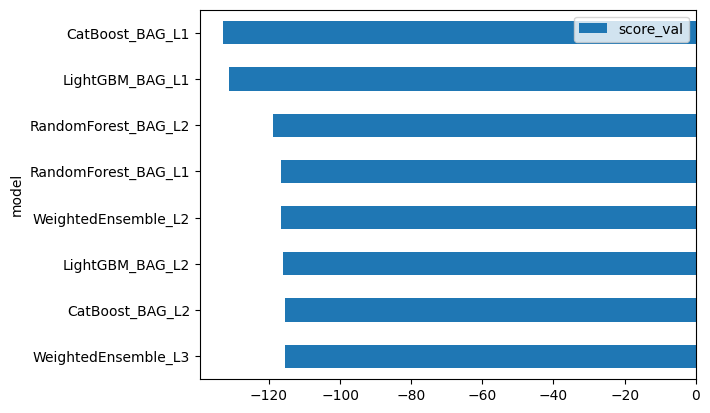

In [166]:
predictor.leaderboard().plot(kind = 'barh', x = 'model', y = 'score_val');

### Create predictions from test dataset

In [167]:
predictions = predictor.evaluate(train)
predictions

{'root_mean_squared_error': -54.52627715536111,
 'mean_squared_error': -2973.1149004232548,
 'mean_absolute_error': -31.079938161335907,
 'r2': 0.9093847053715614,
 'pearsonr': 0.9638816754982003,
 'median_absolute_error': -16.952144622802734}

In [168]:
predictions = predictor.predict(test)
predictions.head()

0     94.456100
1     97.082504
2     97.082504
3    102.723152
4    102.723152
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [169]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      221.111084
std       126.125397
min        15.671859
25%       123.961937
50%       198.534470
75%       304.069244
max       640.844421
Name: count, dtype: float64

In [170]:
# How many negative values do we have?
sum(predictions < 0)

0

In [171]:
# Set them to zero
predictions = predictions.apply(lambda x: 0 if x < 1 else x)
print(sum(predictions < 0))

0


### Set predictions to submission dataframe, save, and submit

In [172]:
submission = SampleSubmission.copy()
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [173]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [174]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [175]:
new_train = train.copy()
new_test = test.copy()

In [176]:
# predictor.feature_importance(new_train)

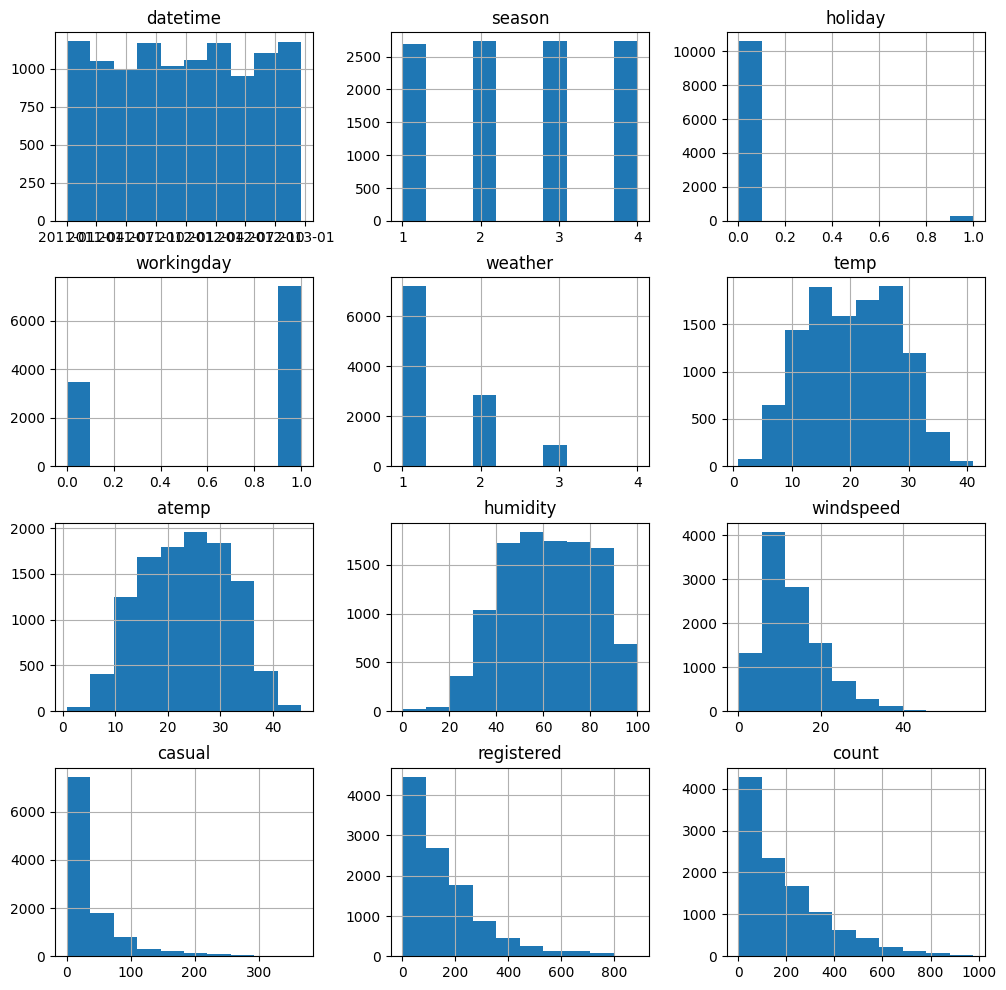

In [177]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
new_train.hist(figsize = (12, 12));

In [178]:
new_train.corr()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


In [179]:
# create a new feature
new_train['year'] = new_train['datetime'].dt.year
new_train['month'] = new_train['datetime'].dt.month
new_train['day'] = new_train['datetime'].dt.day
new_train['hour'] = new_train['datetime'].dt.hour
# train['minute'] = train['datetime'].dt.minute
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
# test['minute'] = test['datetime'].dt.minute

In [180]:
new_train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [181]:
new_train["season"] = new_train['season'].astype('category')
new_train["weather"] = new_train['weather'].astype('category')
new_test["season"] = new_test['season'].astype('category')
new_test["weather"] = new_test['weather'].astype('category')
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int32         
 10  month       6493 non-null   int32         
 11  day         6493 non-null   int32         
 12  hour        6493 non-null   int32         
dtypes: category(2), datetime64[ns](1), float64(3), int32(4), int64(3)
memory usage: 469.7 KB


In [182]:
# View are new feature
new_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [183]:
new_train.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
year              2
month            12
day              19
hour             24
dtype: int64

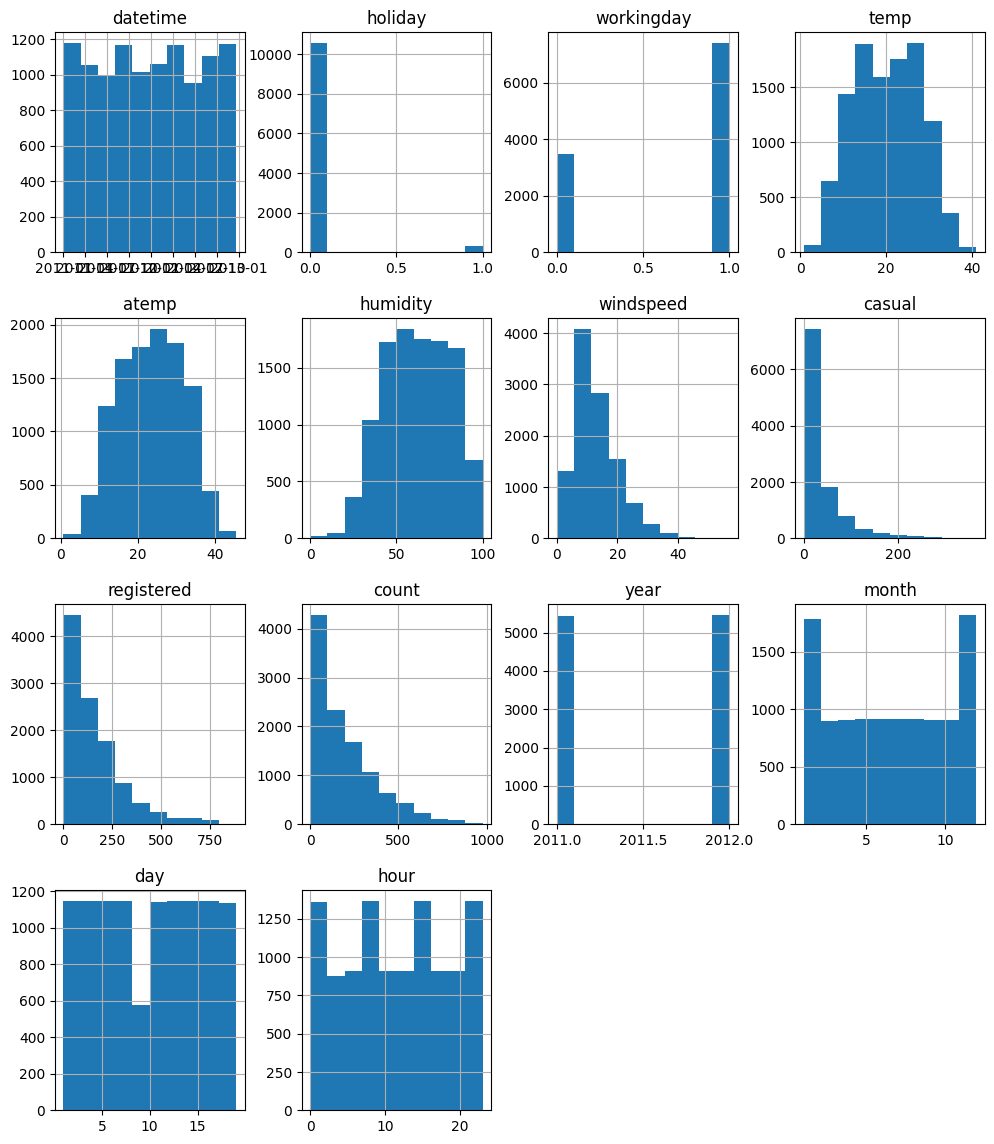

In [184]:
# View histogram of all features again now with the hour feature
new_train.hist(figsize = (12, 14));

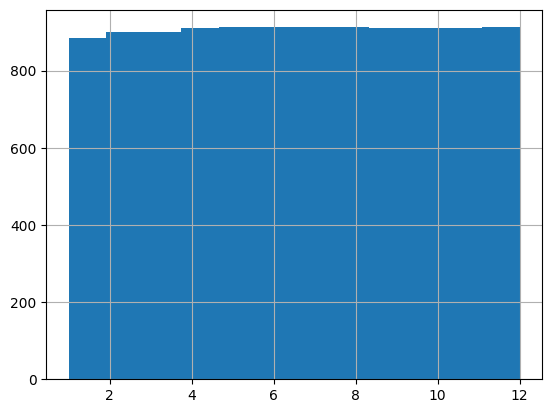

In [185]:
new_train['month'].hist(bins = 12);

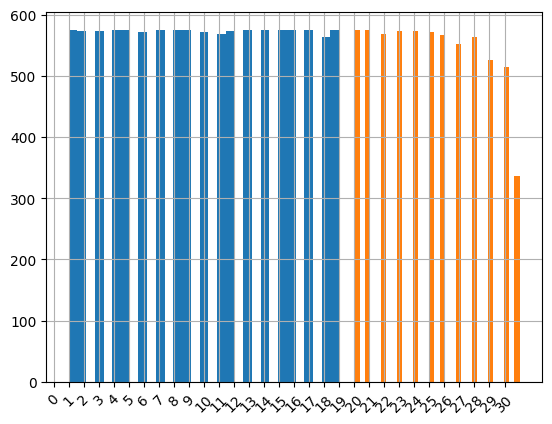

In [186]:
new_train['day'].hist(bins = 31)
new_test['day'].hist(bins = 31)
plt.xticks(np.arange(0, 31, 1), rotation = 45)
plt.show()

In [187]:
new_train.corr()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187,0.866570,0.494087,0.028563,-0.005663
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045


#### The data has been split according to days of the month. Having month as a feature would affect our model.

In [188]:
new_train.drop('day', axis = 1, inplace = True)
new_test.drop('day', axis = 1, inplace = True)

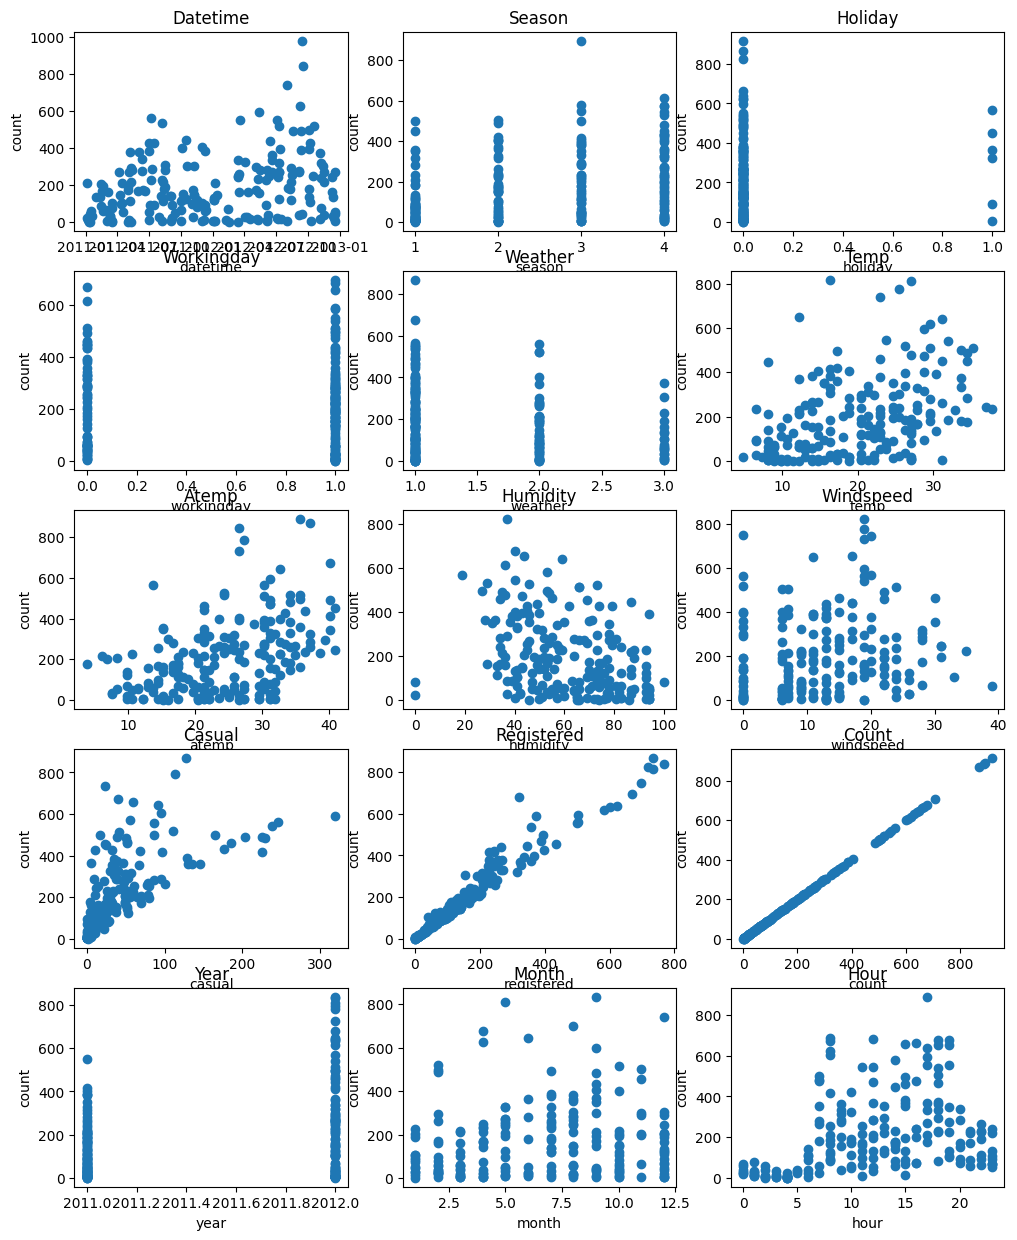

In [189]:
import seaborn as sns
plt.figure(figsize = (12, 15))
for i, column in enumerate(new_train.columns):
    plt.subplot(5, 3, i+1)
    plt.scatter(data = new_train.sample(200), x = column, y = 'count');
    plt.title(column.capitalize())
    plt.xlabel(column)
    plt.ylabel('count')

## Step 5: Rerun the model with the same settings as before, just with more features

In [190]:
predictor_new_features = TabularPredictor(label = 'count', 
                                          problem_type = 'regression', 
                                          eval_metric = 'rmse').fit(
    train_data = new_train.loc[:, ~new_train.columns.isin(['casual', 'registered'])],
    presets = 'best_quality',
    time_limit = 600,
    hyperparameters = hyperparameters)

No path specified. Models will be saved in: "AutogluonModels\ag-20240508_114044"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels\ag-20240508_114044\ds_sub_fit\sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 166 seconds

In [191]:
predictor_new_features.fit_summary()

C:\Users\mkand\anaconda3\envs\myenv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -33.404734  root_mean_squared_error       5.151828  167.690086                0.001012           0.024341            3       True          8
1  WeightedEnsemble_L2 -33.594050  root_mean_squared_error       3.914631   94.444909                0.000000           0.026154            2       True          4
2      CatBoost_BAG_L2 -33.689509  root_mean_squared_error       4.055956  147.684658                0.141325          53.265903            2       True          7
3      LightGBM_BAG_L2 -34.047268  root_mean_squared_error       4.202517  100.543113                0.287887           6.124358            2       True          5
4      LightGBM_BAG_L1 -34.289686  root_mean_squared_error       2.860368    9.077131                2.860368         

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -34.28968593259563,
  'RandomForest_BAG_L1': -38.36377397117803,
  'CatBoost_BAG_L1': -36.52475093030419,
  'WeightedEnsemble_L2': -33.59404962285627,
  'LightGBM_BAG_L2': -34.047268368512746,
  'RandomForest_BAG_L2': -34.6846290432251,
  'CatBoost_BAG_L2': -33.689508652203095,
  'WeightedEnsemble_L3': -33.40473437308282},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'RandomForest_BAG_L1': ['RandomForest_BAG_L1'],
  'CatBoost_BAG_L1': ['CatBoost_BAG_L1'],
  'WeightedEnsemble_

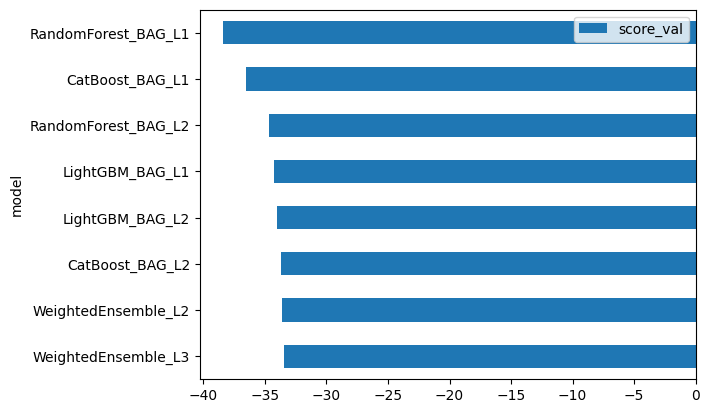

In [192]:
predictor_new_features.leaderboard().plot(kind = "barh", x = 'model', y = 'score_val');

In [193]:
# Remember to set all negative values to zero
new_predictions = predictor_new_features.predict(new_test)
sum(new_predictions < 0)

3

In [194]:
new_predictions = new_predictions.apply(lambda x:0 if x < 0 else x)

In [195]:
# Same submitting predictions
submission_new_features = SampleSubmission.copy()
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [196]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [197]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [200]:
hyperparameters = {
    'GBM': {'num_boost_round': 1500},  # Adjust hyperparameters for Gradient Boosting Machines
    'RF': {'n_estimators': 500},      # Adjust hyperparameters for Random Forest
    'CAT': {'iterations': 1200},        # Adjust hyperparameters for CatBoost
}
hyperparameter_tune_kwargs = {
    "n_estimators": [50, 100, 200],
    "search_options": {
        "num_initial_points": 20,
        "num_random_draws": 20
    }
}

In [201]:
predictor_new_hpo = TabularPredictor(label = "count",
                                    problem_type = 'regression',
                                    eval_metric = 'rmse').fit(
    train_data = new_train.loc[: , ~new_train.columns.isin(['registered', 'casual'])],
    time_limit = 600,
    presets = 'best_quality',
    hyperparameters = hyperparameters
)

No path specified. Models will be saved in: "AutogluonModels\ag-20240508_115330"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels\ag-20240508_115330\ds_sub_fit\sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 158 seconds

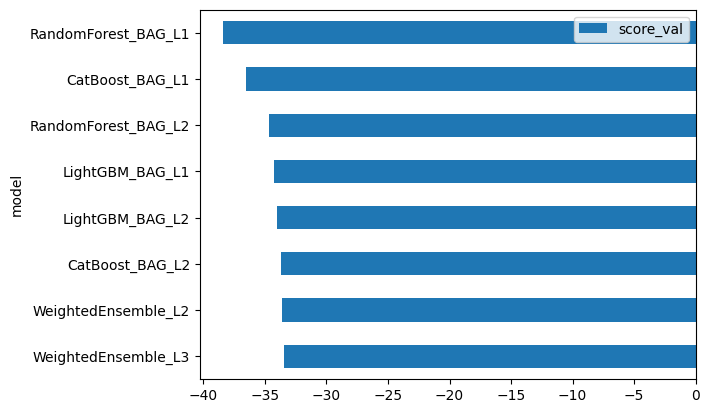

In [202]:
predictor_new_features.leaderboard().plot(kind = "barh", x = 'model', y = 'score_val');

In [203]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -33.229256  root_mean_squared_error      11.301091  180.318288                0.000000           0.015625            3       True          8
1  WeightedEnsemble_L2 -33.297079  root_mean_squared_error      10.894725  115.980423                0.000994           0.029259            2       True          4
2      CatBoost_BAG_L2 -33.587954  root_mean_squared_error      11.019572  175.001328                0.125841          59.050164            2       True          7
3      LightGBM_BAG_L2 -33.927570  root_mean_squared_error      11.175250  121.252499                0.281519           5.301335            2       True          5
4      LightGBM_BAG_L1 -34.087450  root_mean_squared_error       9.944816   16.331880                9.944816         

C:\Users\mkand\anaconda3\envs\myenv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -34.08745018692304,
  'RandomForest_BAG_L1': -38.398906929029046,
  'CatBoost_BAG_L1': -35.90088880015512,
  'WeightedEnsemble_L2': -33.29707916625004,
  'LightGBM_BAG_L2': -33.92756950114039,
  'RandomForest_BAG_L2': -34.770432813410615,
  'CatBoost_BAG_L2': -33.58795403398089,
  'WeightedEnsemble_L3': -33.22925550391688},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'RandomForest_BAG_L1': ['RandomForest_BAG_L1'],
  'CatBoost_BAG_L1': ['CatBoost_BAG_L1'],
  'WeightedEnsemble

In [204]:
# Remember to set all negative values to zero
new_predictions = predictor_new_hpo.predict(new_test)
sum(new_predictions < 0)

25

In [205]:
new_predictions = new_predictions.apply(lambda x: 0 if x < 0 else x)

In [206]:
# Same submitting predictions
submission_new_hpo = SampleSubmission.copy()
submission_new_hpo["count"] = new_predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [207]:
predictor_new_hpo.leaderboard()[predictor_new_hpo.leaderboard()['model'] == predictor_new_hpo.model_best]

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-33.229256,root_mean_squared_error,11.301091,180.318288,0.0,0.015625,3,True,8


In [208]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [209]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [210]:
predictor.leaderboard()[predictor.leaderboard()['model'] == predictor.model_best]

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-115.365808,root_mean_squared_error,4.068449,66.234142,0.0,0.011149,3,True,8


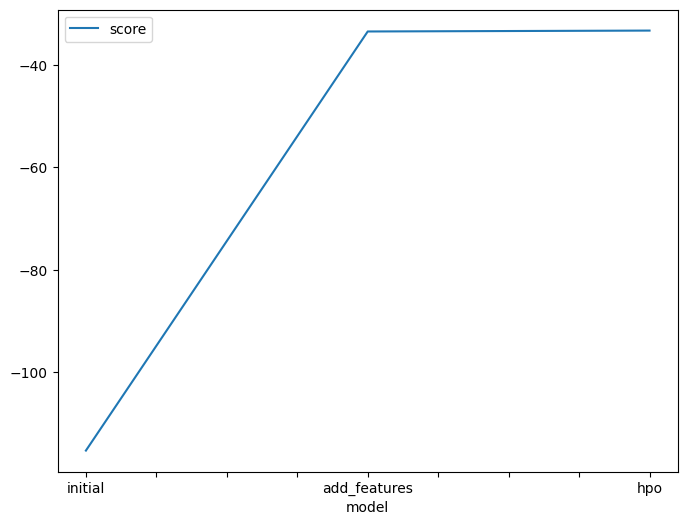

In [211]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [predictor.leaderboard()[predictor.leaderboard()['model'] == predictor.model_best].score_val[0],
                  predictor_new_features.leaderboard()[predictor_new_features.leaderboard()['model'] == predictor_new_features.model_best].score_val[0], 
                  predictor_new_hpo.leaderboard()[predictor_new_hpo.leaderboard()['model'] == predictor_new_hpo.model_best].score_val[-0]]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

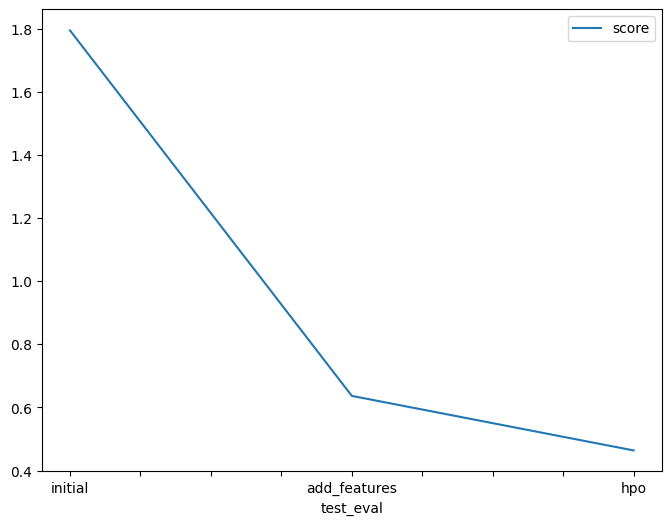

In [214]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79465, 0.63665, 0.46384]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [216]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [1000, 1000, 1000],
    "hpo2": [300, 300, 300],
    "hpo3": [1000, 300, 1000],
    "score": [1.43272, 0.48506, 0.46384]
})

,model,hpo1,hpo2,hpo3,score
0,initial,1000,300,1000,1.43272
1,add_features,1000,300,300,0.48506
2,hpo,1000,300,1000,0.46384
